In [1166]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud, STOPWORDS
import locale
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()

In [1167]:
# Functions

# Flatten nested columns

# 1

def fetch_name(obj): 
    if isinstance(obj, str) and '{' in obj:
        L = []
        for i in ast.literal_eval(obj):
            L.append(i['name'])
        return L
    
# 2

def fetch_name_2(obj): 
    if isinstance(obj, str) and '{' in obj:
        dic = ast.literal_eval(obj)
        return dic['name']

In [1168]:
# Read dataset

ML_dataset = pd.read_csv("movies_dataset.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15552\2088380725.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  ML_dataset = pd.read_csv("movies_dataset.csv")


In [1169]:
# Explore dataset

ML_dataset.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

In [1170]:
ML_dataset.tail()

adult belongs_to_collection budget  \
45461  False                   NaN      0   
45462  False                   NaN      0   
45463  False                   NaN      0   
45464  False                   NaN      0   
45465  False                   NaN      0   

                                                  genres  \
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language       original_title  \
45461                fa              رگ خواب   
45462                tl  Siglo ng Pagluluwal   
45463                en             Betrayal   
45464                en  Satana likuyushchiy   
45465                en             Queerama   

                                                overview  ... release_date  \
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisation of homosexual...  ...   2017-06-09   

      revenue runtime                          spoken_languages    status  \
45461     0.0    90.0    [{'iso_639_1': 'fa', 'name': 'فارسی'}]  Released   
45462     0.0   360.0         [{'iso_639_1': 'tl', 'name': ''}]  Released   
45463     0.0    90.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
45464     0.0    87.0                                        []  Released   
45465     0.0    75.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                          tagline                title  video  \
45461  Rising and falling between a man and woman               Subdue  False   
45462                                         NaN  Century of Birthing  False   
45463                      A deadly game of wits.             Betrayal  False   
45464                                         NaN     Satan Triumphant  False   
45465                                         NaN             Queerama  False   

      vote_average vote_count  
45461          4.0        1.0  
45462          9.0        3.0  
45463          3.8        6.0  
45464          0.0        0.0  
45465          0.0        0.0  

[5 rows x 24 columns]

In [1171]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [1172]:
ML_dataset.shape

(45466, 24)

In [1173]:
# Faltten nested columns

# Using functions from the beginning

ML_dataset["genres"] = ML_dataset["genres"].apply(fetch_name).map(str)
ML_dataset["belongs_to_collection"] = ML_dataset["belongs_to_collection"].apply(fetch_name_2)
ML_dataset["production_companies"]  = ML_dataset["production_companies"].apply(fetch_name)
ML_dataset["production_countries"]  = ML_dataset["production_countries"].apply(fetch_name)
ML_dataset["spoken_languages"] = ML_dataset["spoken_languages"].apply(fetch_name)
ML_dataset.head(3)

adult      belongs_to_collection    budget  \
0  False       Toy Story Collection  30000000   
1  False                       None  65000000   
2  False  Grumpy Old Men Collection         0   

                               genres                              homepage  \
0   ['Animation', 'Comedy', 'Family']  http://toystory.disney.com/toy-story   
1  ['Adventure', 'Fantasy', 'Family']                                   NaN   
2               ['Romance', 'Comedy']                                   NaN   

      id    imdb_id original_language    original_title  \
0    862  tt0114709                en         Toy Story   
1   8844  tt0113497                en           Jumanji   
2  15602  tt0113228                en  Grumpier Old Men   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   

       revenue runtime     spoken_languages    status  \
0  373554033.0    81.0            [English]  Released   
1  262797249.0   104.0  [English, Français]  Released   
2          0.0   101.0            [English]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

In [1174]:
# Date treatment

ML_dataset["release_date"].replace("1", np.nan, inplace = True)
ML_dataset["release_date"].replace("12", np.nan, inplace = True)
fechas_datetime = pd.to_datetime(ML_dataset["release_date"], format='%Y-%m-%d', errors = 'coerce')
ML_dataset["release_date"] = fechas_datetime.dropna()
ML_dataset.dropna(subset = ["release_date"], inplace=True)
ML_dataset["release_year"] = ML_dataset["release_date"].dt.year
ML_dataset.drop(columns = "release_date", inplace = True)

In [1175]:
ML_dataset.head(3)

adult      belongs_to_collection    budget  \
0  False       Toy Story Collection  30000000   
1  False                       None  65000000   
2  False  Grumpy Old Men Collection         0   

                               genres                              homepage  \
0   ['Animation', 'Comedy', 'Family']  http://toystory.disney.com/toy-story   
1  ['Adventure', 'Fantasy', 'Family']                                   NaN   
2               ['Romance', 'Comedy']                                   NaN   

      id    imdb_id original_language    original_title  \
0    862  tt0114709                en         Toy Story   
1   8844  tt0113497                en           Jumanji   
2  15602  tt0113228                en  Grumpier Old Men   

                                            overview  ...      revenue  \
0  Led by Woody, Andy's toys live happily in his ...  ...  373554033.0   
1  When siblings Judy and Peter discover an encha...  ...  262797249.0   
2  A family wedding reignites the ancient feud be...  ...          0.0   

  runtime     spoken_languages    status  \
0    81.0            [English]  Released   
1   104.0  [English, Français]  Released   
2   101.0            [English]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count release_year  
0          7.7     5415.0         1995  
1          6.9     2413.0         1995  
2          6.5       92.0         1995  

[3 rows x 24 columns]

In [1176]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45376 non-null  object 
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45376 non-null  object 
 3   genres                 45376 non-null  object 
 4   homepage               7766 non-null   object 
 5   id                     45376 non-null  object 
 6   imdb_id                45362 non-null  object 
 7   original_language      45365 non-null  object 
 8   original_title         45376 non-null  object 
 9   overview               44435 non-null  object 
 10  popularity             45376 non-null  object 
 11  poster_path            45037 non-null  object 
 12  production_companies   33580 non-null  object 
 13  production_countries   39165 non-null  object 
 14  revenue                45376 non-null  float64
 15  ru

In [1177]:
# Wordcloud

# Columns as strings and fill variables

ML_dataset["title"] = ML_dataset["title"].astype(str)
ML_dataset["overview"] = ML_dataset["overview"].astype(str)
title_words = ' '.join(ML_dataset["title"])
overview_words = ' '.join(ML_dataset["overview"])

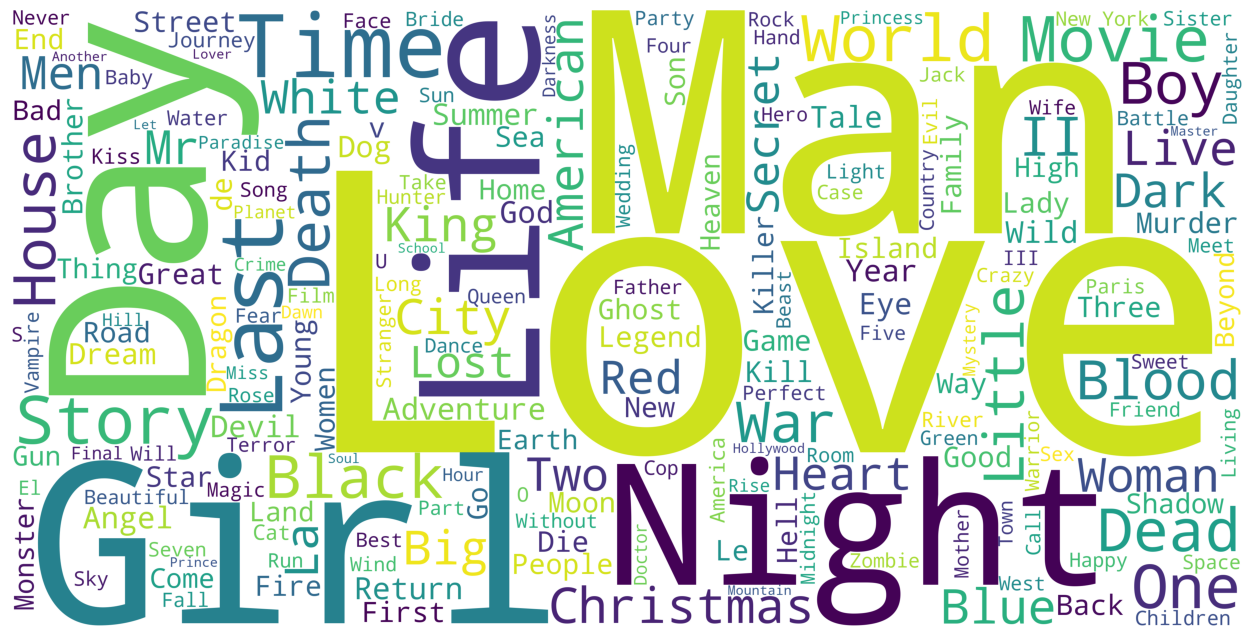

In [1178]:
# Create title word cloud

title_cloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_words)
plt.figure(figsize=(16,8))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

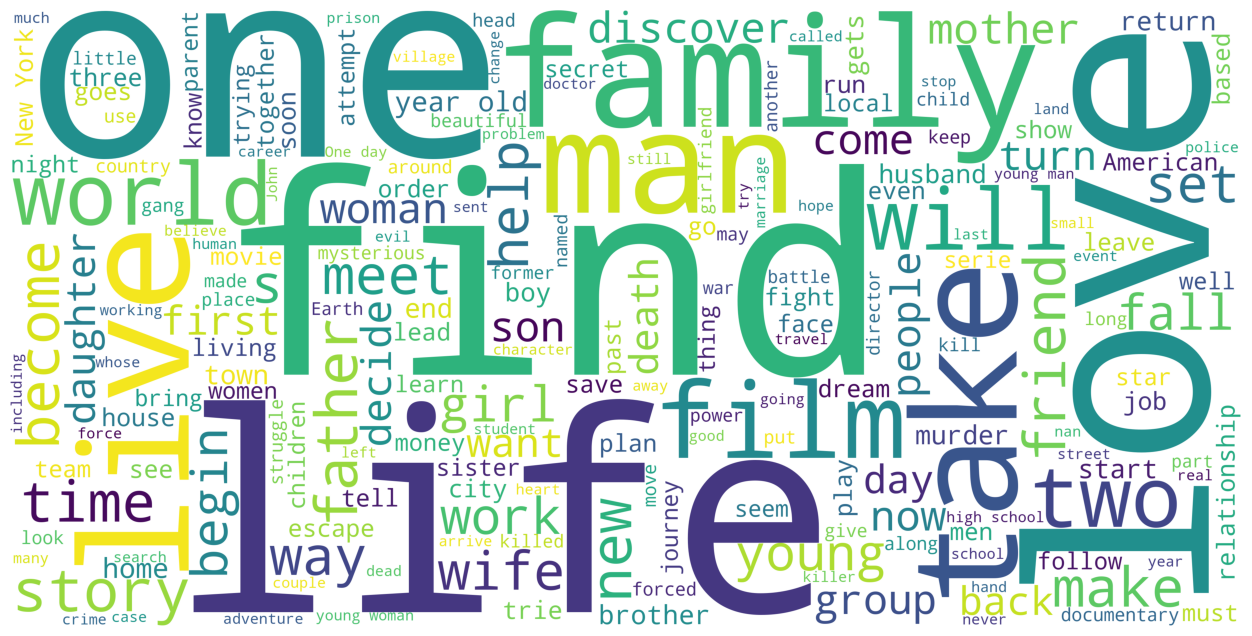

In [1179]:
# Create overview word cloud

nube_overview = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_words)
plt.figure(figsize=(16,8))
plt.imshow(nube_overview)
plt.axis('off')
plt.show()

In [1180]:
# Drop unnecessary columns

# Drop

# Unbalanced dataset, poor information

ML_dataset["adult"].value_counts()

False    45368
True         8
Name: adult, dtype: int64

In [1181]:
#Drop

# Too much nulls, poor information

ML_dataset["belongs_to_collection"].isnull().sum()


40888

In [1182]:
# Drop 

# We going to keep only the revenue column

ML_dataset["budget"].value_counts()

0            36490
5000000        286
10000000       259
20000000       243
2000000        242
             ...  
270000000        1
923              1
72500000         1
2160000          1
1254040          1
Name: budget, Length: 1223, dtype: int64

In [1183]:
# Continue

# Can group movies by the genres they belong

genres = ML_dataset["genres"].value_counts()
genres

['Drama']                                           4998
['Comedy']                                          3621
['Documentary']                                     2713
None                                                2384
['Drama', 'Romance']                                1301
                                                    ... 
['Comedy', 'Animation', 'Fantasy']                     1
['TV Movie', 'Animation', 'Family', 'Comedy']          1
['Fantasy', 'Documentary', 'Animation', 'Drama']       1
['Fantasy', 'Mystery', 'Romance']                      1
['Family', 'Animation', 'Romance', 'Comedy']           1
Name: genres, Length: 4065, dtype: int64

In [1184]:
# Example

ML_dataset[ML_dataset["genres"] == "['Thriller', 'Horror', 'Drama', 'Fantasy']"]

adult belongs_to_collection   budget  \
7189   False                  None  6000000   
24257  False                  None        0   

                                           genres homepage      id    imdb_id  \
7189   ['Thriller', 'Horror', 'Drama', 'Fantasy']      NaN   57744  tt0095454   
24257  ['Thriller', 'Horror', 'Drama', 'Fantasy']      NaN  149509  tt1528071   

      original_language original_title  \
7189                 en       The Kiss   
24257                en          Horns   

                                                overview  ... revenue runtime  \
7189   Teenager Amy Halloran’s mother is killed in a ...  ...     0.0   101.0   
24257  In the aftermath of his girlfriend's mysteriou...  ...     0.0   120.0   

      spoken_languages    status                             tagline  \
7189         [English]  Released  Don't do it with your eyes closed.   
24257        [English]  Released  He Will Bring Out The Devil In You   

          title  video vote_average vote_count release_year  
7189   The Kiss  False          5.6       15.0         1988  
24257     Horns  False          6.2      878.0         2013  

[2 rows x 24 columns]

In [1185]:
# Drop

# Poor information

ML_dataset["homepage"].value_counts()

http://www.georgecarlin.com                               12
http://www.wernerherzog.com/films-by.html                  7
http://breakblade.jp/                                      6
http://www.crownintlpictures.com/tztitles.html             4
http://www.missionimpossible.com/                          4
                                                          ..
http://rampartmovie.com/                                   1
http://singyoursongthemovie.com/                           1
http://extremelyloudandincrediblyclose.warnerbros.com/     1
http://www.thetreefilm.com/                                1
http://lmtr.fi/                                            1
Name: homepage, Length: 7657, dtype: int64

In [1186]:
# Drop

# Poor information

ML_dataset["id"].value_counts()

141971    3
97995     2
10991     2
109962    2
119916    2
         ..
40594     1
23104     1
37605     1
91727     1
461257    1
Name: id, Length: 45346, dtype: int64

In [1187]:
# Drop

# Poor information

ML_dataset["imdb_id"].value_counts()

tt1180333    3
tt0111613    2
tt0157472    2
tt0080000    2
tt0235679    2
            ..
tt0223783    1
tt1027091    1
tt0033787    1
tt0054016    1
tt6980792    1
Name: imdb_id, Length: 45332, dtype: int64

In [1188]:
# Continue

# Can group movies by the film record language

language = ML_dataset["original_language"].value_counts()
language

en    32202
fr     2437
it     1528
ja     1349
de     1078
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: original_language, Length: 89, dtype: int64

In [1189]:
# Example: group japanese movies

ML_dataset[ML_dataset["original_language"] == "ja"]

adult          belongs_to_collection    budget  \
490    False                           None         0   
723    False  Ghost in the Shell Collection         0   
830    False                           None         0   
838    False                           None         0   
1174   False                           None  11500000   
...      ...                            ...       ...   
45042  False                           None         0   
45055  False                           None         0   
45096  False                           None         0   
45116  False                           None         0   
45210  False                           None         0   

                                           genres homepage      id    imdb_id  \
490                          ['Drama', 'Romance']      NaN    5879  tt0074102   
723    ['Action', 'Animation', 'Science Fiction']      NaN    9323  tt0113568   
830                                     ['Drama']      NaN  116690  tt0051980   
838                                     ['Drama']      NaN  132641  tt0046468   
1174               ['Action', 'Drama', 'History']      NaN   11645  tt0089881   
...                                           ...      ...     ...        ...   
45042                                  ['Comedy']      NaN   80303  tt0296236   
45055                                        None      NaN  429918  tt5890000   
45096                                        None      NaN   62447  tt1935737   
45116   ['Music', 'Animation', 'Science Fiction']      NaN   10840  tt0114038   
45210                                   ['Drama']      NaN  117800  tt0056081   

      original_language          original_title  \
490                  ja                  愛のコリーダ   
723                  ja      GHOST IN THE SHELL   
830                  ja                    楢山節考   
838                  ja                   Tsuma   
1174                 ja                       乱   
...                 ...                     ...   
45042                ja  That's カンニング! 史上最大の作戦?   
45055                ja              サバイバルファミリー   
45096                ja                   水のコトバ   
45116                ja    On Your Mark ジブリ実験剧场   
45210                ja               Hourou-ki   

                                                overview  ...    revenue  \
490    Based on a true story set in pre-war Japan, a ...  ...        0.0   
723    In the year 2029, the barriers of our world ha...  ...  2287714.0   
830    In Kabuki style, the film tells the story of a...  ...        0.0   
838    Ten years into a marriage, the wife is disappo...  ...        0.0   
1174   Set in Japan in the 16th century (or so), an e...  ...  4069653.0   
...                                                  ...  ...        ...   
45042  Comedy about a group of chemistry students who...  ...        0.0   
45055  A world wide electrical outage occurs. Everyth...  ...        0.0   
45096  Several people are spending their evening in a...  ...        0.0   
45116  This animated short by Miyazaki was created as...  ...        0.0   
45210  Considered one of the finest late Naruses and ...  ...        0.0   

      runtime spoken_languages    status  \
490     105.0            [日本語]  Released   
723      83.0            [日本語]  Released   
830      98.0            [日本語]  Released   
838      89.0            [日本語]  Released   
1174    162.0            [日本語]  Released   
...       ...              ...       ...   
45042    98.0            [日本語]  Released   
45055   117.0            [日本語]  Released   
45096     9.0            [日本語]  Released   
45116     7.0    [No Language]  Released   
45210   124.0            [日本語]  Released   

                                        tagline  \
490                                         NaN   
723    It found a voice... Now it needs a body.   
830                                         NaN   
838                                         NaN   
1174              The Greatest Shakespe

In [1190]:
# Drop

# Keep "tile" column

ML_dataset["original_title"].value_counts()

Alice in Wonderland                                       8
Hamlet                                                    8
Cinderella                                                7
Macbeth                                                   7
A Christmas Carol                                         7
                                                         ..
See What I'm Saying: The Deaf Entertainers Documentary    1
Facing Ali                                                1
The Beast                                                 1
Pretty Bird                                               1
Queerama                                                  1
Name: original_title, Length: 43288, dtype: int64

In [1191]:
# Drop

# Poor information

ML_dataset["overview"].value_counts()

nan                                                                                                                                                                                                                                                                                                             941
No overview found.                                                                                                                                                                                                                                                                                              133
No Overview                                                                                                                                                                                                                                                                                                       7
                                                                            

In [1192]:
# Continue

# Can group by movie score

ML_dataset["popularity"] = ML_dataset["popularity"].astype(float)
print(ML_dataset["popularity"].value_counts())
print(ML_dataset["popularity"].min())
print(ML_dataset["popularity"].max())

0.000001    56
0.000308    42
0.000000    40
0.000220    39
0.000844    38
            ..
0.261949     1
1.600340     1
0.944390     1
1.134351     1
0.163015     1
Name: popularity, Length: 43731, dtype: int64
0.0
547.488298


In [1193]:
# Drop

# Poor information

ML_dataset["poster_path"].value_counts()

/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg    5
/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg    4
/qW1oQlOHizRHXZQrpkimYr0oxzn.jpg    4
/cdwVC18URfEdQjjxqJyRMoGDC0H.jpg    3
/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg    3
                                   ..
/hNlT6mv0EmJG3aks5qUqw3igBlr.jpg    1
/noY7r59VAMiXiP6CreeR7IKHGOi.jpg    1
/vqTtmm944G58cQZbGrITGnT0cB6.jpg    1
/7HvTGfK1szYWzfarRXHGTyxqurC.jpg    1
/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg    1
Name: poster_path, Length: 44981, dtype: int64

In [1194]:
# Continue

# Can group by the production company of the movie

ML_dataset["production_companies"] = ML_dataset["production_companies"].astype(str)
company = ML_dataset["production_companies"].value_counts()
company

None                                                                                                                                                                 11796
['Metro-Goldwyn-Mayer (MGM)']                                                                                                                                          742
['Warner Bros.']                                                                                                                                                       540
['Paramount Pictures']                                                                                                                                                 505
['Twentieth Century Fox Film Corporation']                                                                                                                             439
                                                                                                                                                 

In [1195]:
# Example

ML_dataset[ML_dataset["production_companies"] == "['Warner Bros.']"]

adult                    belongs_to_collection    budget  \
143    False                                     None         0   
258    False                                     None  17000000   
266    False                                     None  60000000   
416    False                                     None         0   
452    False  The Fugitive / U.S. Marshals Collection  44000000   
...      ...                                      ...       ...   
44639  False                                     None         0   
44640  False                                     None         0   
44687  False                                     None         0   
44689  False                                     None         0   
44691  False                                     None         0   

                                                  genres homepage      id  \
143           ['Action', 'Adventure', 'Drama', 'Family']      NaN   30765   
258                       ['Drama', 'Family', 'Fantasy']      NaN   19101   
266                                 ['Drama', 'Romance']      NaN   43742   
416           ['Action', 'Adventure', 'Drama', 'Family']      NaN   14522   
452    ['Adventure', 'Action', 'Thriller', 'Crime', '...      NaN    5503   
...                                                  ...      ...     ...   
44639                                      ['Animation']      NaN   34933   
44640                  ['Animation', 'Family', 'Comedy']      NaN  101503   
44687                  ['Animation', 'Family', 'Comedy']      NaN   83765   
44689                                      ['Animation']      NaN  102161   
44691                  ['Animation', 'Family', 'Comedy']      NaN   83750   

         imdb_id original_language               original_title  \
143    tt0112342                en  The Amazing Panda Adventure   
258    tt0113670                en            A Little Princess   
266    tt0110391                en                  Love Affair   
416    tt0109279                en                 Black Beauty   
452    tt0106977                en                 The Fugitive   
...          ...               ...                          ...   
44639  tt0045585                en               Bully for Bugs   
44640  tt0050111                en               Ali Baba Bunny   
44687  tt0044609                en               Feed the Kitty   
44689  tt0045000                en            Operation: Rabbit   
44691  tt0046908                en               Devil May Hare   

                                                overview  ...      revenue  \
143    Far from home in the lush bamboo forests of Ch...  ...          0.0   
258    When her father enlists to fight for the Briti...  ...          0.0   
266    Ex-football star Mike Gambril meets Terry McKa...  ...          0.0   
416    The fates of horses, and the people who own an...  ...          0.0   
452    Wrongfully accused of murdering his wife, Rich...  ...  368875760.0   
...                                                  ...  ...          ...   
44639  Bugs Bunny once again making that "wrong turn ...  ...          0.0   
44640  Bugs and Daffy get lost on the way to Pismo Be...  ...          0.0   
44687  A bulldog adopts a small cat, but he can't let...  ...          0.0   
44689  Wile E. Coyote, genius, announces to Bugs Bunn...  ...          0.0   
44691  The Tasmanian Devil is on the loose. Bugs offe...  ...          0.0   

      runtime     spoken_languages    status  \
143      81.0            [Deutsch]  Released   
258      97.0  [English, Français]  Released   
266     108.0            [English]  Released   
416      88.0            [English]  Released   
452     130.0            [English]  Released   
...       ...                  ...       ...   
44639     7.0            [English]  Released   
44640     7.0  [English, Français]  Released   
44687     7.0  [English, Français]  Released   
44689     7.0            [English]  Released   
44691  

In [1196]:
# Continue

# Can group by countries where the movie was produced

ML_dataset["production_countries"] = ML_dataset["production_countries"].astype(str)
country = ML_dataset["production_countries"].value_counts()
country

['United States of America']                        17846
None                                                 6211
['United Kingdom']                                   2235
['France']                                           1653
['Japan']                                            1356
                                                    ...  
['Romania', 'United Kingdom', 'Canada']                 1
['Finland', 'Germany', 'Netherlands']                   1
['France', 'Denmark', 'Spain', 'Sweden']                1
['France', 'United States of America', 'Canada']        1
['Egypt', 'Italy', 'United States of America']          1
Name: production_countries, Length: 2389, dtype: int64

In [1197]:
# Example

# French movies

ML_dataset[ML_dataset["production_countries"] == "['France']"]

adult belongs_to_collection    budget  \
67     False                  None         0   
72     False                  None         0   
95     False                  None   3000000   
113    False                  None  13365000   
260    False                  None  10000000   
...      ...                   ...       ...   
45446  False                  None         0   
45447  False                  None         0   
45448  False                  None         0   
45450  False                  None         0   
45451  False                  None         0   

                                  genres homepage      id    imdb_id  \
67                 ['Comedy', 'Romance']      NaN    4482  tt0113149   
72                  ['Drama', 'History']      NaN   48750  tt0113828   
95                             ['Drama']      NaN     406  tt0113247   
113                           ['Comedy']      NaN   43612  tt0112556   
260                   ['Crime', 'Drama']      NaN   17961  tt0109731   
...                                  ...      ...     ...        ...   
45446              ['Fantasy', 'Comedy']      NaN   49271  tt0127948   
45447                               None      NaN   44324  tt0135631   
45448                               None      NaN  122036  tt0224286   
45450  ['Fantasy', 'Action', 'Thriller']      NaN   49280  tt0135453   
45451              ['Comedy', 'Fantasy']      NaN  106807  tt0135571   

      original_language                     original_title  \
67                   fr                       Gazon maudit   
72                   fr                     Les misérables   
95                   fr                           La Haine   
113                  en         Le Bonheur est dans le pré   
260                  fr                            L'Enfer   
...                 ...                                ...   
45446                en            Le locataire diabolique   
45447                fr               Le Roi du maquillage   
45448                fr  Les Transmutations imperceptibles   
45450                fr                  L'Homme orchestre   
45451                fr     Nouvelles luttes extravagantes   

                                                overview  ...  revenue  \
67     After learning of her husband's infidelities, ...  ...      0.0   
72     In France during World War II, a poor and illi...  ...      0.0   
95     Aimlessly whiling away their days in the concr...  ...      0.0   
113    Francis, the boss of a small plumbing supply c...  ...      0.0   
260    Paul, an irritable and stressed-out hotel mana...  ...      0.0   
...                                                  ...  ...      ...   
45446  A man rents an apartment and furnishes it in r...  ...      0.0   
45447  The background of this picture represents a sc...  ...      0.0   
45448  This shows a prince entering upon the stage of...  ...      0.0   
45450  A band-leader has arranged seven chairs for th...  ...      0.0   
45451         A series of fantastical wrestling matches.  ...      0.0   

      runtime     spoken_languages    status  \
67       95.0  [Français, Español]  Released   
72      175.0           [Français]  Released   
95       98.0           [Français]  Released   
113     106.0           [Français]  Released   
260     100.0           [Français]  Released   
...       ...                  ...       ...   
45446     6.0                 None  Released   
45447     3.0                 None  Released   
45448     2.0                 None  Released   
45450     1.0        [No Language]  Released   
45451     2.0        [No Language]  Released   

                                                 tagline  \
67                                                   NaN   
72     In a time of chaos, in a world of change, he w...   
95               Three Young Friends... One Last Chance.   
113                                                  NaN   
260                                                  N

In [1198]:
# Continue

# We going to keep only the revenue column 

# Can group by blockbuster movies

ML_dataset["revenue"].value_counts()

0.0           37969
12000000.0       20
10000000.0       19
11000000.0       19
2000000.0        18
              ...  
36565280.0        1
439564.0          1
35610100.0        1
10217873.0        1
1413000.0         1
Name: revenue, Length: 6863, dtype: int64

In [1199]:
# Continue

# Can group by long and short movies

runtime = ML_dataset["runtime"].value_counts()
runtime

90.0     2549
0.0      1535
100.0    1470
95.0     1410
93.0     1214
         ... 
410.0       1
283.0       1
238.0       1
566.0       1
780.0       1
Name: runtime, Length: 353, dtype: int64

In [1200]:
# Drop

ML_dataset["spoken_languages"].value_counts()

[English]                              22380
[Français]                              1852
[日本語]                                   1289
[Italiano]                              1217
[Español]                                901
                                       ...  
[Deutsch, , ελληνικά, English]             1
[English, suomi, Deutsch, svenska]         1
[English, Français, Deutsch, فارسی]        1
[svenska, English, Español]                1
[Fulfulde, English]                        1
Name: spoken_languages, Length: 1842, dtype: int64

In [1201]:
# Drop

# We want to recommend a released movie

ML_dataset["status"].value_counts()

Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [1202]:
# Drop

# Poor information

ML_dataset["tagline"].value_counts()

Based on a true story.                                        7
Trust no one.                                                 4
-                                                             4
Be careful what you wish for.                                 4
Know Your Enemy                                               3
                                                             ..
If It's On TV, It Must Be The Truth.                          1
"I LOVE YOU BABY, BUT MY WIFE JUST REFUSES TO UNDERSTAND!"    1
That Joyous New Musical !                                     1
It's nice work - and you can get it!                          1
A deadly game of wits.                                        1
Name: tagline, Length: 20269, dtype: int64

In [1203]:
# Continue

# Output variable

ML_dataset["title"].value_counts()

Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Les Misérables           8
Beauty and the Beast     8
                        ..
Lampaansyöjät            1
Animal Kingdom           1
The Exploding Girl       1
Prodigal Sons            1
Queerama                 1
Name: title, Length: 42196, dtype: int64

In [1204]:
# Drop

# Unbalanced data 

ML_dataset["video"].value_counts()

False    45287
True        89
Name: video, dtype: int64

In [1205]:
# Continue

# Objective variable

print(ML_dataset["vote_average"].value_counts())
print(ML_dataset["vote_average"].min())
print(ML_dataset["vote_average"].max())

0.0    2947
6.0    2462
5.0    1998
7.0    1883
6.5    1722
       ... 
9.1       2
9.6       1
9.8       1
0.7       1
1.1       1
Name: vote_average, Length: 92, dtype: int64
0.0
10.0


In [1206]:
# Continue

# Goes with popularity

ML_dataset["vote_count"].value_counts()

1.0       3242
2.0       3127
0.0       2849
3.0       2785
4.0       2478
          ... 
2755.0       1
1187.0       1
4200.0       1
3322.0       1
2712.0       1
Name: vote_count, Length: 1820, dtype: int64

In [1207]:
# Continue

# Can groupy by old and new movies

year = ML_dataset["release_year"].value_counts()
year

2014    1974
2015    1905
2013    1889
2012    1722
2011    1667
        ... 
2020       1
1887       1
1878       1
1874       1
1883       1
Name: release_year, Length: 135, dtype: int64

In [1208]:
ML_dataset.drop(columns = ["adult", "belongs_to_collection", "budget", "homepage", "id", "imdb_id", "overview", "poster_path", "revenue", "spoken_languages", "status", "tagline", "original_title", "video"], inplace = True)
ML_dataset.head(3)

genres original_language  popularity  \
0   ['Animation', 'Comedy', 'Family']                en   21.946943   
1  ['Adventure', 'Fantasy', 'Family']                en   17.015539   
2               ['Romance', 'Comedy']                en   11.712900   

                                production_companies  \
0                        ['Pixar Animation Studios']   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...   
2                 ['Warner Bros.', 'Lancaster Gate']   

           production_countries  runtime             title  vote_average  \
0  ['United States of America']     81.0         Toy Story           7.7   
1  ['United States of America']    104.0           Jumanji           6.9   
2  ['United States of America']    101.0  Grumpier Old Men           6.5   

   vote_count  release_year  
0      5415.0          1995  
1      2413.0          1995  
2        92.0          1995

In [1209]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                45376 non-null  object 
 1   original_language     45365 non-null  object 
 2   popularity            45376 non-null  float64
 3   production_companies  45376 non-null  object 
 4   production_countries  45376 non-null  object 
 5   runtime               45130 non-null  float64
 6   title                 45376 non-null  object 
 7   vote_average          45376 non-null  float64
 8   vote_count            45376 non-null  float64
 9   release_year          45376 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


In [1210]:
# Check nulls

ML_dataset.isnull().sum()

genres                    0
original_language        11
popularity                0
production_companies      0
production_countries      0
runtime                 246
title                     0
vote_average              0
vote_count                0
release_year              0
dtype: int64

In [1211]:
# Drop nulls and duplicates

ML_dataset.dropna(inplace = True)
ML_dataset.drop_duplicates(inplace=True)
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45102 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                45102 non-null  object 
 1   original_language     45102 non-null  object 
 2   popularity            45102 non-null  float64
 3   production_companies  45102 non-null  object 
 4   production_countries  45102 non-null  object 
 5   runtime               45102 non-null  float64
 6   title                 45102 non-null  object 
 7   vote_average          45102 non-null  float64
 8   vote_count            45102 non-null  float64
 9   release_year          45102 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


In [1212]:
# Dummy variables

ML_dataset["genres"] = pd.Categorical(ML_dataset["genres"]).codes
ML_dataset["original_language"] = pd.Categorical(ML_dataset["original_language"]).codes
ML_dataset["production_companies"] = pd.Categorical(ML_dataset["production_companies"]).codes
ML_dataset["production_countries"] = pd.Categorical(ML_dataset["production_countries"]).codes
ML_dataset["title"] = pd.Categorical(ML_dataset["title"]).codes

In [1214]:
# Normalization of numerical attributes

scaler = MinMaxScaler() # Class object

numeric_features = ["popularity", "runtime","vote_average", "release_year", "vote_count"]

ML_dataset[numeric_features] = scaler.fit_transform(ML_dataset[numeric_features]) # Transformation

In [1215]:
ML_dataset.head()

genres  original_language  popularity  production_companies  \
0    1088                 17    0.040087                 15222   
1     940                 17    0.031079                 19632   
2    3311                 17    0.021394                 21684   
3    1396                 17    0.007049                 20065   
4    1597                 17    0.015320                 16855   

   production_countries   runtime  title  vote_average  vote_count  \
0                  2365  0.064490  38748          0.77    0.384725   
1                  2365  0.082803  16672          0.69    0.171439   
2                  2365  0.080414  13274          0.65    0.006536   
3                  2365  0.101115  40133          0.61    0.002416   
4                  2365  0.084395  11108          0.57    0.012291   

   release_year  
0      0.828767  
1      0.828767  
2      0.828767  
3      0.828767  
4      0.828767

In [1216]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45102 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                45102 non-null  int16  
 1   original_language     45102 non-null  int8   
 2   popularity            45102 non-null  float64
 3   production_companies  45102 non-null  int16  
 4   production_countries  45102 non-null  int16  
 5   runtime               45102 non-null  float64
 6   title                 45102 non-null  int32  
 7   vote_average          45102 non-null  float64
 8   vote_count            45102 non-null  float64
 9   release_year          45102 non-null  float64
dtypes: float64(5), int16(3), int32(1), int8(1)
memory usage: 2.5 MB


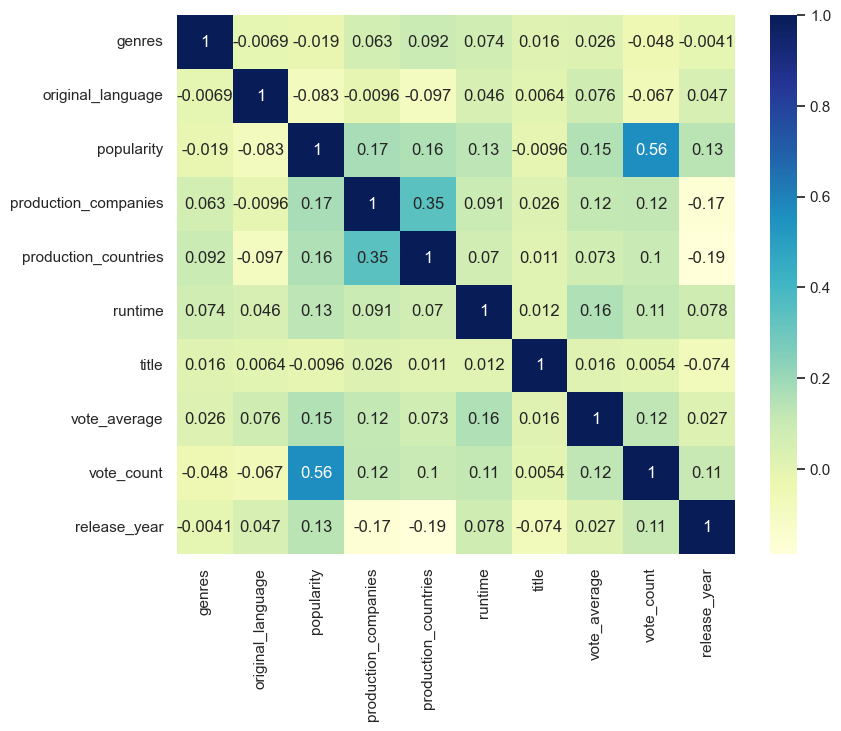

In [1217]:
corr = ML_dataset.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

In [1218]:
# Drop redundant columns

ML_dataset.drop(columns = "vote_count", inplace = True)
ML_dataset.head(3)

genres  original_language  popularity  production_companies  \
0    1088                 17    0.040087                 15222   
1     940                 17    0.031079                 19632   
2    3311                 17    0.021394                 21684   

   production_countries   runtime  title  vote_average  release_year  
0                  2365  0.064490  38748          0.77      0.828767  
1                  2365  0.082803  16672          0.69      0.828767  
2                  2365  0.080414  13274          0.65      0.828767

In [1221]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45102 entries, 0 to 45465
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                45102 non-null  int16  
 1   original_language     45102 non-null  int8   
 2   popularity            45102 non-null  float64
 3   production_companies  45102 non-null  int16  
 4   production_countries  45102 non-null  int16  
 5   runtime               45102 non-null  float64
 6   title                 45102 non-null  int32  
 7   vote_average          45102 non-null  float64
 8   release_year          45102 non-null  float64
dtypes: float64(4), int16(3), int32(1), int8(1)
memory usage: 2.2 MB


In [1219]:
# Statistics

ML_dataset.describe()

genres  original_language    popularity  production_companies  \
count  45102.000000       45102.000000  45102.000000          45102.000000   
mean    1906.700678          22.539887      0.005373           8869.766285   
std     1003.398181          14.119599      0.011003           7686.645651   
min        0.000000           0.000000      0.000000              0.000000   
25%     1406.000000          17.000000      0.000727              0.000000   
50%     1843.000000          17.000000      0.002081           8215.500000   
75%     2382.000000          17.000000      0.006809          15696.000000   
max     4057.000000          88.000000      1.000000          22599.000000   

       production_countries       runtime         title  vote_average  \
count          45102.000000  45102.000000  45102.000000  45102.000000   
mean            1564.727617      0.074992  21026.594630      0.563518   
std              889.509474      0.030526  12099.611657      0.190017   
min                0.000000      0.000000      0.000000      0.000000   
25%              986.000000      0.067675  10512.250000      0.500000   
50%             1937.000000      0.075637  21076.500000      0.600000   
75%             2365.000000      0.085191  31568.750000      0.680000   
max             2382.000000      1.000000  41945.000000      1.000000   

       release_year  
count  45102.000000  
mean       0.807265  
std        0.164818  
min        0.000000  
25%        0.712329  
50%        0.869863  
75%        0.931507  
max        1.000000

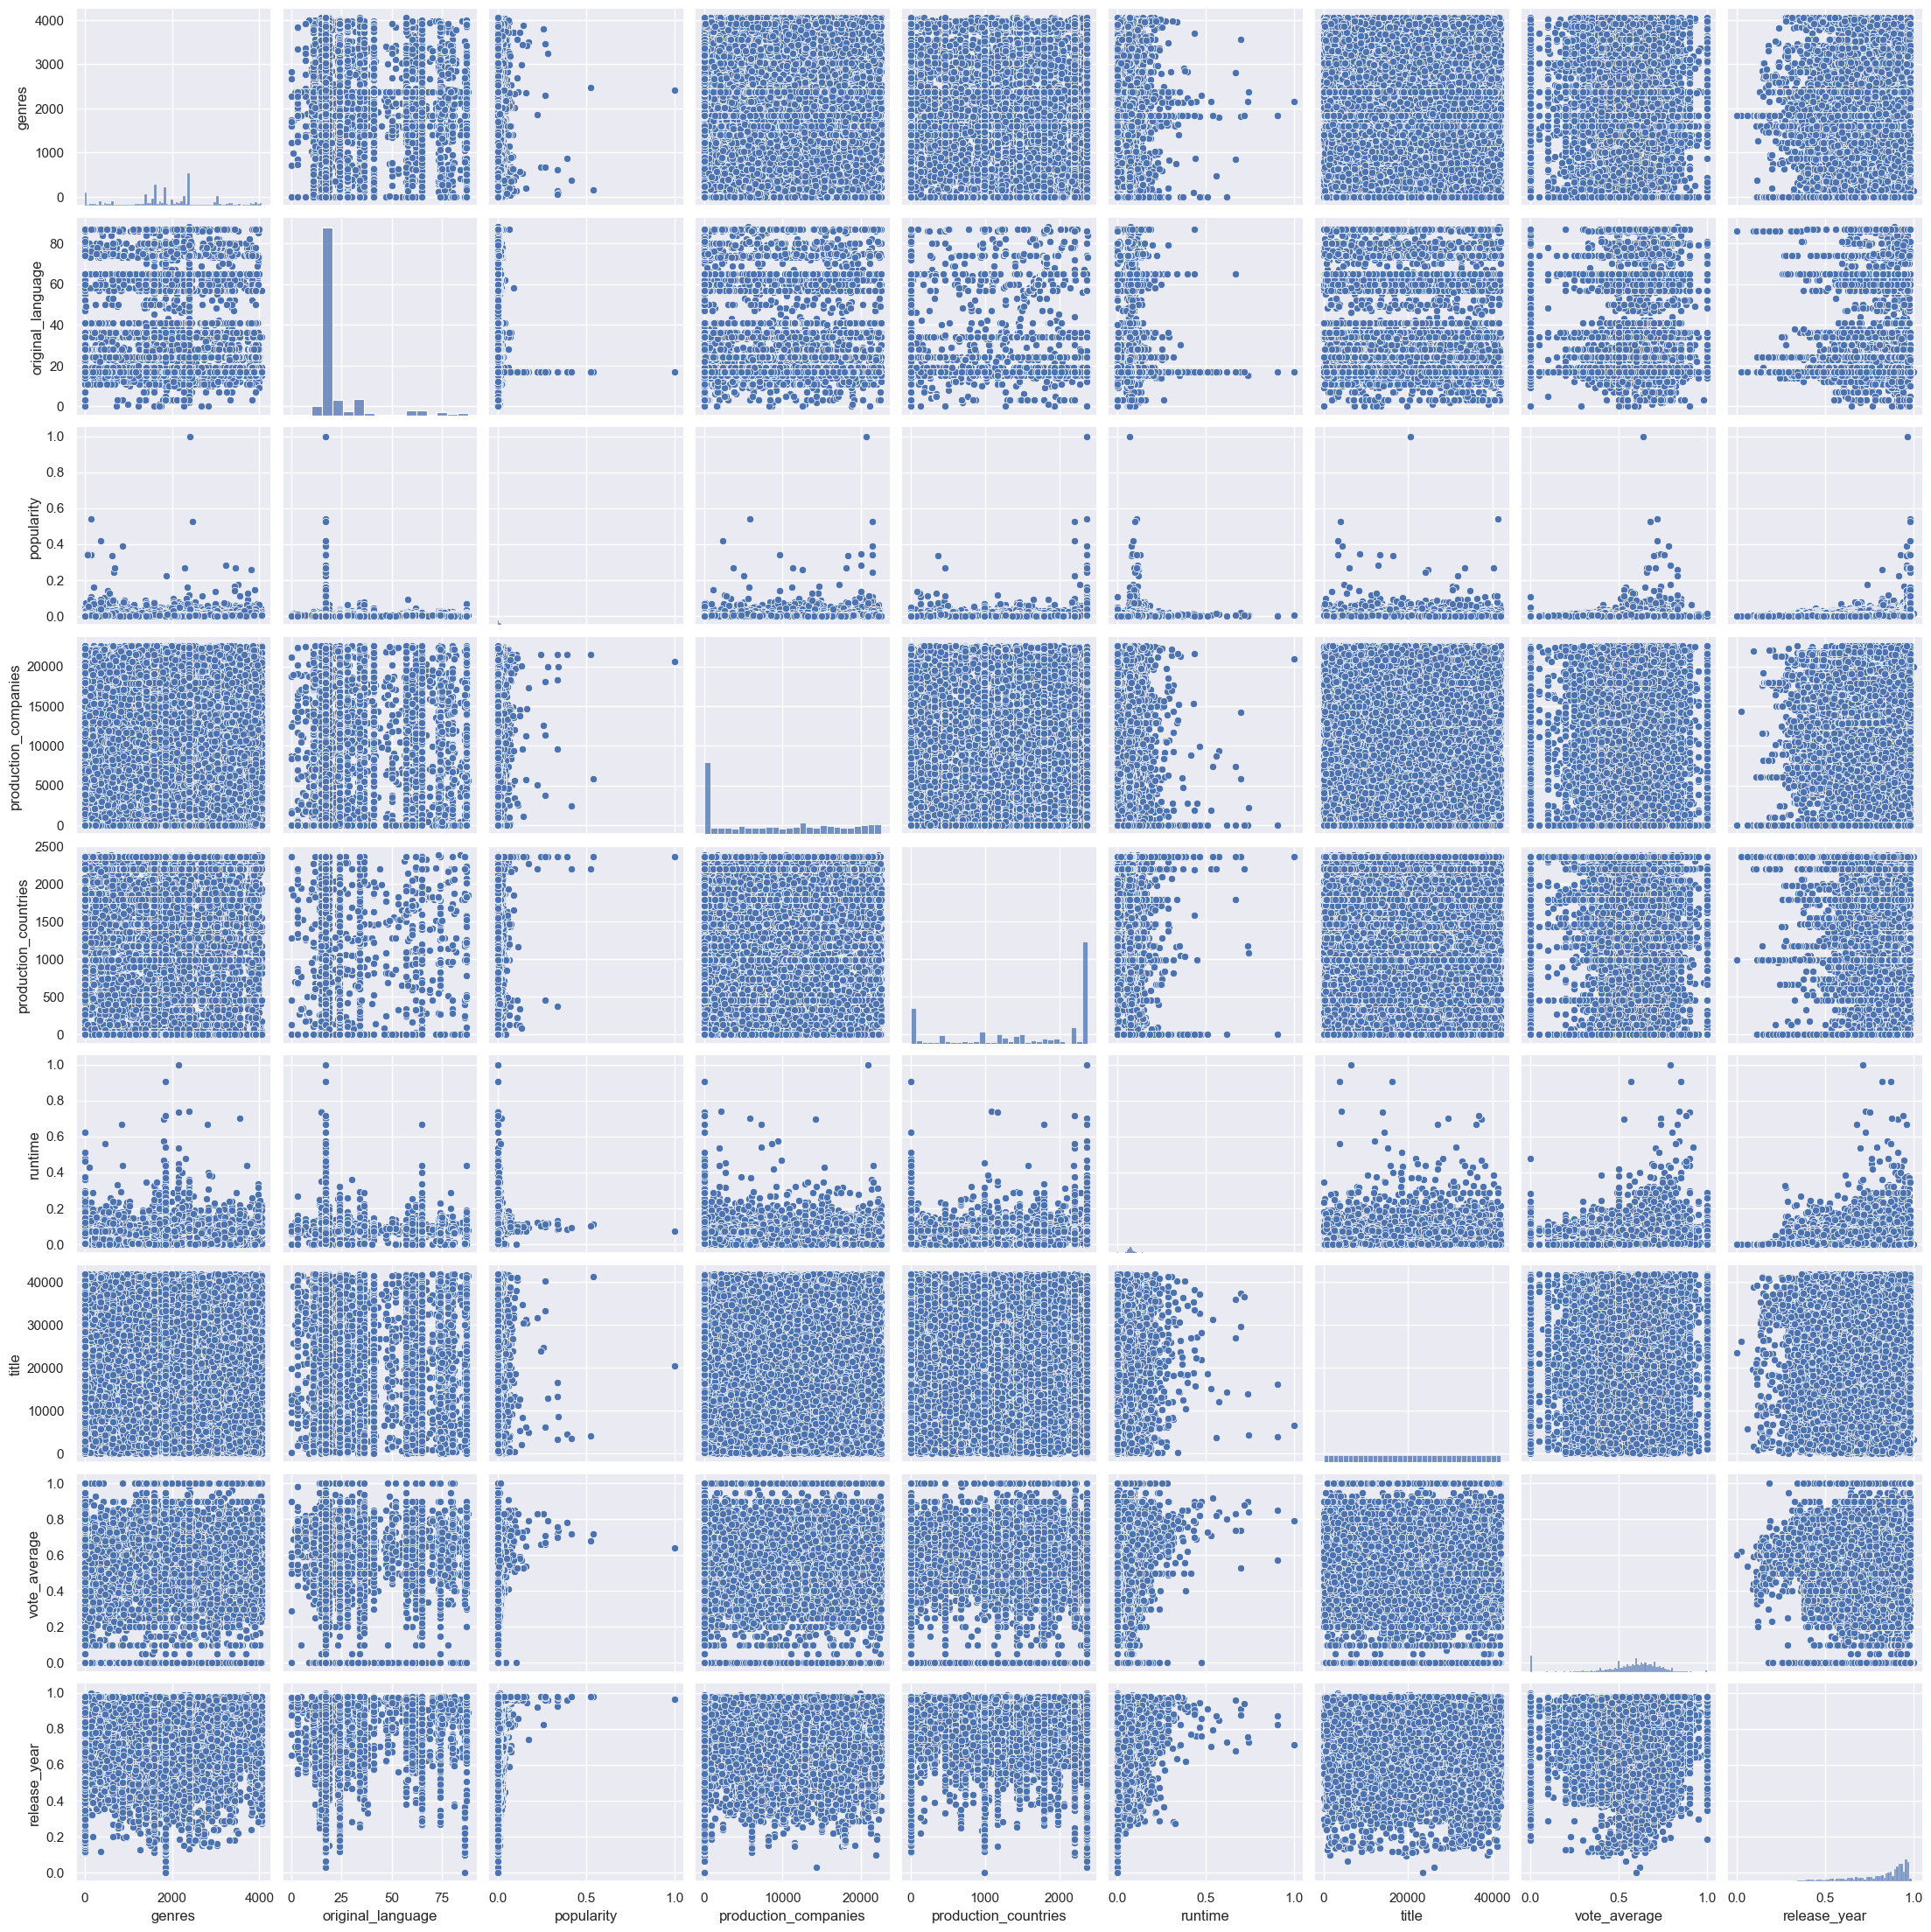

In [1220]:
sns.pairplot(ML_dataset)
plt.show()

In [1222]:
# Save ML dataset

# df = df[["title", "overview", "vote_average", "vote_count"]]
# df
# df.to_csv("ML_dataset.csv", index = False)